In [1]:
import pandas as pd

C:\Users\user\AppData\Local\Temp\ipykernel_4308\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the master dataset
df = pd.read_csv('master_dataset.csv')

In [3]:
# Show first 5 rows
df.head(10)

,Disease,Symptoms,Symptom_Description,Precautions
0,Fungal infection,"itching, skin_rash, nodal_skin_eruptions, d...","In humans, fungal infections occur when an inv...","['bath twice', 'use detol or neem in bathing w..."
1,Fungal infection,"skin_rash, nodal_skin_eruptions, dischromic...","In humans, fungal infections occur when an inv...","['bath twice', 'use detol or neem in bathing w..."
2,Fungal infection,"itching, nodal_skin_eruptions, dischromic_pa...","In humans, fungal infections occur when an inv...","['bath twice', 'use detol or neem in bathing w..."
3,Fungal infection,"itching, skin_rash, dischromic_patches","In humans, fungal infections occur when an inv...","['bath twice', 'use detol or neem in bathing w..."
4,Fungal infection,"itching, skin_rash, nodal_skin_eruptions","In humans, fungal infections occur when an inv...","['bath twice', 'use detol or neem in bathing w..."
5,Allergy,"continuous_sneezing, shivering, chills, wat...",An allergy is an immune system response to a f...,"['apply calamine', 'cover area with bandage', ..."
6,Allergy,"shivering, chills, watering_from_eyes",An allergy is an immune system response to a f...,"['apply calamine', 'cover area with bandage', ..."
7,Allergy,"continuous_sneezing, chills, watering_from_eyes",An allergy is an immune system response to a f...,"['apply calamine', 'cover area with bandage', ..."
8,Allergy,"continuous_sneezing, shivering, watering_fro...",An allergy is an immune system response to a f...,"['apply calamine', 'cover area with bandage', ..."
9,Allergy,"continuous_sneezing, shivering, chills",An allergy is an immune system response to a f...,"['apply calamine', 'cover area with bandage', ..."


In [4]:
# Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Disease              304 non-null    object
 1   Symptoms             304 non-null    object
 2   Symptom_Description  298 non-null    object
 3   Precautions          304 non-null    object
dtypes: object(4)
memory usage: 9.6+ KB


In [5]:
# Check for missing values
print(df.isnull().sum())

Disease                0
Symptoms               0
Symptom_Description    6
Precautions            0
dtype: int64


In [5]:
df.describe()

,Disease,Symptoms,Symptom_Description,Precautions
count,304,304,298,304
unique,41,304,40,41
top,Hepatitis D,"itching, skin_rash, nodal_skin_eruptions, d...","Hepatitis D, also known as the hepatitis delta...","['consult doctor', 'medication', 'eat healthy'..."
freq,10,1,10,10


In [6]:
# Check unique diseases
print("Unique diseases:", df['Disease'].nunique())
print(df['Disease'].value_counts())


Unique diseases: 41
Disease
Hepatitis D                                10
Dengue                                     10
Chicken pox                                10
Migraine                                   10
Hepatitis B                                 9
Hypoglycemia                                9
Common Cold                                 9
Tuberculosis                                9
Hepatitis E                                 9
hepatitis A                                 9
Typhoid                                     9
Hyperthyroidism                             9
Jaundice                                    9
Diabetes                                    9
Pneumonia                                   9
Varicose veins                              8
Malaria                                     8
Hypothyroidism                              8
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Osteoarthristis                             7
Bronch

In [7]:
# Build unique symptom list

# Function to split and clean symptoms
def extract_symptoms(symptom_str):
    return [sym.strip().lower() for sym in symptom_str.split(",") if sym.strip()]

# Build the set of all unique symptoms
all_symptoms = set()

for symptoms in df['Symptoms']:
    symptom_list = extract_symptoms(symptoms)
    all_symptoms.update(symptom_list)

# Convert to sorted list
all_symptoms = sorted(list(all_symptoms))

# Show total symptoms
print(f"Total unique symptoms: {len(all_symptoms)}")
print(all_symptoms)


Total unique symptoms: 131
['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic_patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', 'irritability',

In [61]:
# Save all_symptoms used in training into a file for future use
with open("training_features_list.txt", "w") as f:
    for symptom in all_symptoms:
        f.write(symptom + "\n")

print("✅ Saved training features list to training_features_list.txt")


✅ Saved training features list to training_features_list.txt


In [8]:
# Multi-hot encode Symptoms

# Create empty dataframe to hold features
X_symptoms = pd.DataFrame(0, index=df.index, columns=all_symptoms)

# Populate the multi-hot encoding
for index, row in df.iterrows():
    symptom_list = extract_symptoms(row['Symptoms'])
    for sym in symptom_list:
        X_symptoms.loc[index, sym] = 1

# Show example
X_symptoms.head()


,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# # Multi-hot encode Symptoms
# X_symptoms = pd.DataFrame(0, index=df.index, columns=all_symptoms)

# for index, row in df.iterrows():
#     symptom_list = extract_symptoms(row['Symptoms'])
#     for sym in symptom_list:
#         X_symptoms.loc[index, sym] = 1

# # ✅ Save the feature names used in model training
# all_symptoms = list(X_symptoms.columns)
# print("Saving features used for training:", len(all_symptoms))  # Should be 162


In [9]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Encode target labels (Disease)
le = LabelEncoder()
y_disease = le.fit_transform(df['Disease'])

# Show mapping
disease_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Disease Mapping:")
print(disease_mapping)
joblib.dump(le, 'label_encoder.pkl')


Disease Mapping:
{'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


In [10]:
y_disease

array([15, 15, 15, 15, 15,  4,  4,  4,  4,  4, 16, 16, 16, 16, 16, 16, 16,
        9,  9,  9,  9,  9,  9,  9,  9, 14, 14, 14, 14, 14, 14, 33, 33, 33,
       33, 33, 33, 33,  1,  1,  1,  1,  1, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 17, 17, 17, 17, 17,  6,  6,  6,  6,  6,  6,  6, 23, 23, 23, 23,
       23, 23, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,  7,  7,  7,  7,  7,
        7, 32, 32, 32, 32, 32, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29,
       29, 29, 29, 29, 29, 29,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 37, 37, 37, 37, 37, 37, 37, 37,
       37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22,  3,  3,  3,  3,  3,  3,
        3,  3, 36, 36, 36, 36, 36, 36, 36, 36, 36, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 34, 34, 34, 34, 34, 34, 34, 34, 34, 13, 13, 13, 13, 13,
       13, 18, 18, 18, 18

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split symptoms into a list
df["Symptom_List"] = df["Symptoms"].str.lower().str.split(",")

# Multi-hot encode the symptom list
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(df["Symptom_List"])

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Disease"])


In [13]:
X = X_symptoms
y = y_disease

In [14]:
print("Feature shape (X):", X.shape)
print("Label shape (y):", y.shape)


Feature shape (X): (304, 131)
Label shape (y): (304,)


In [15]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (243, 131)
Test set size: (61, 131)


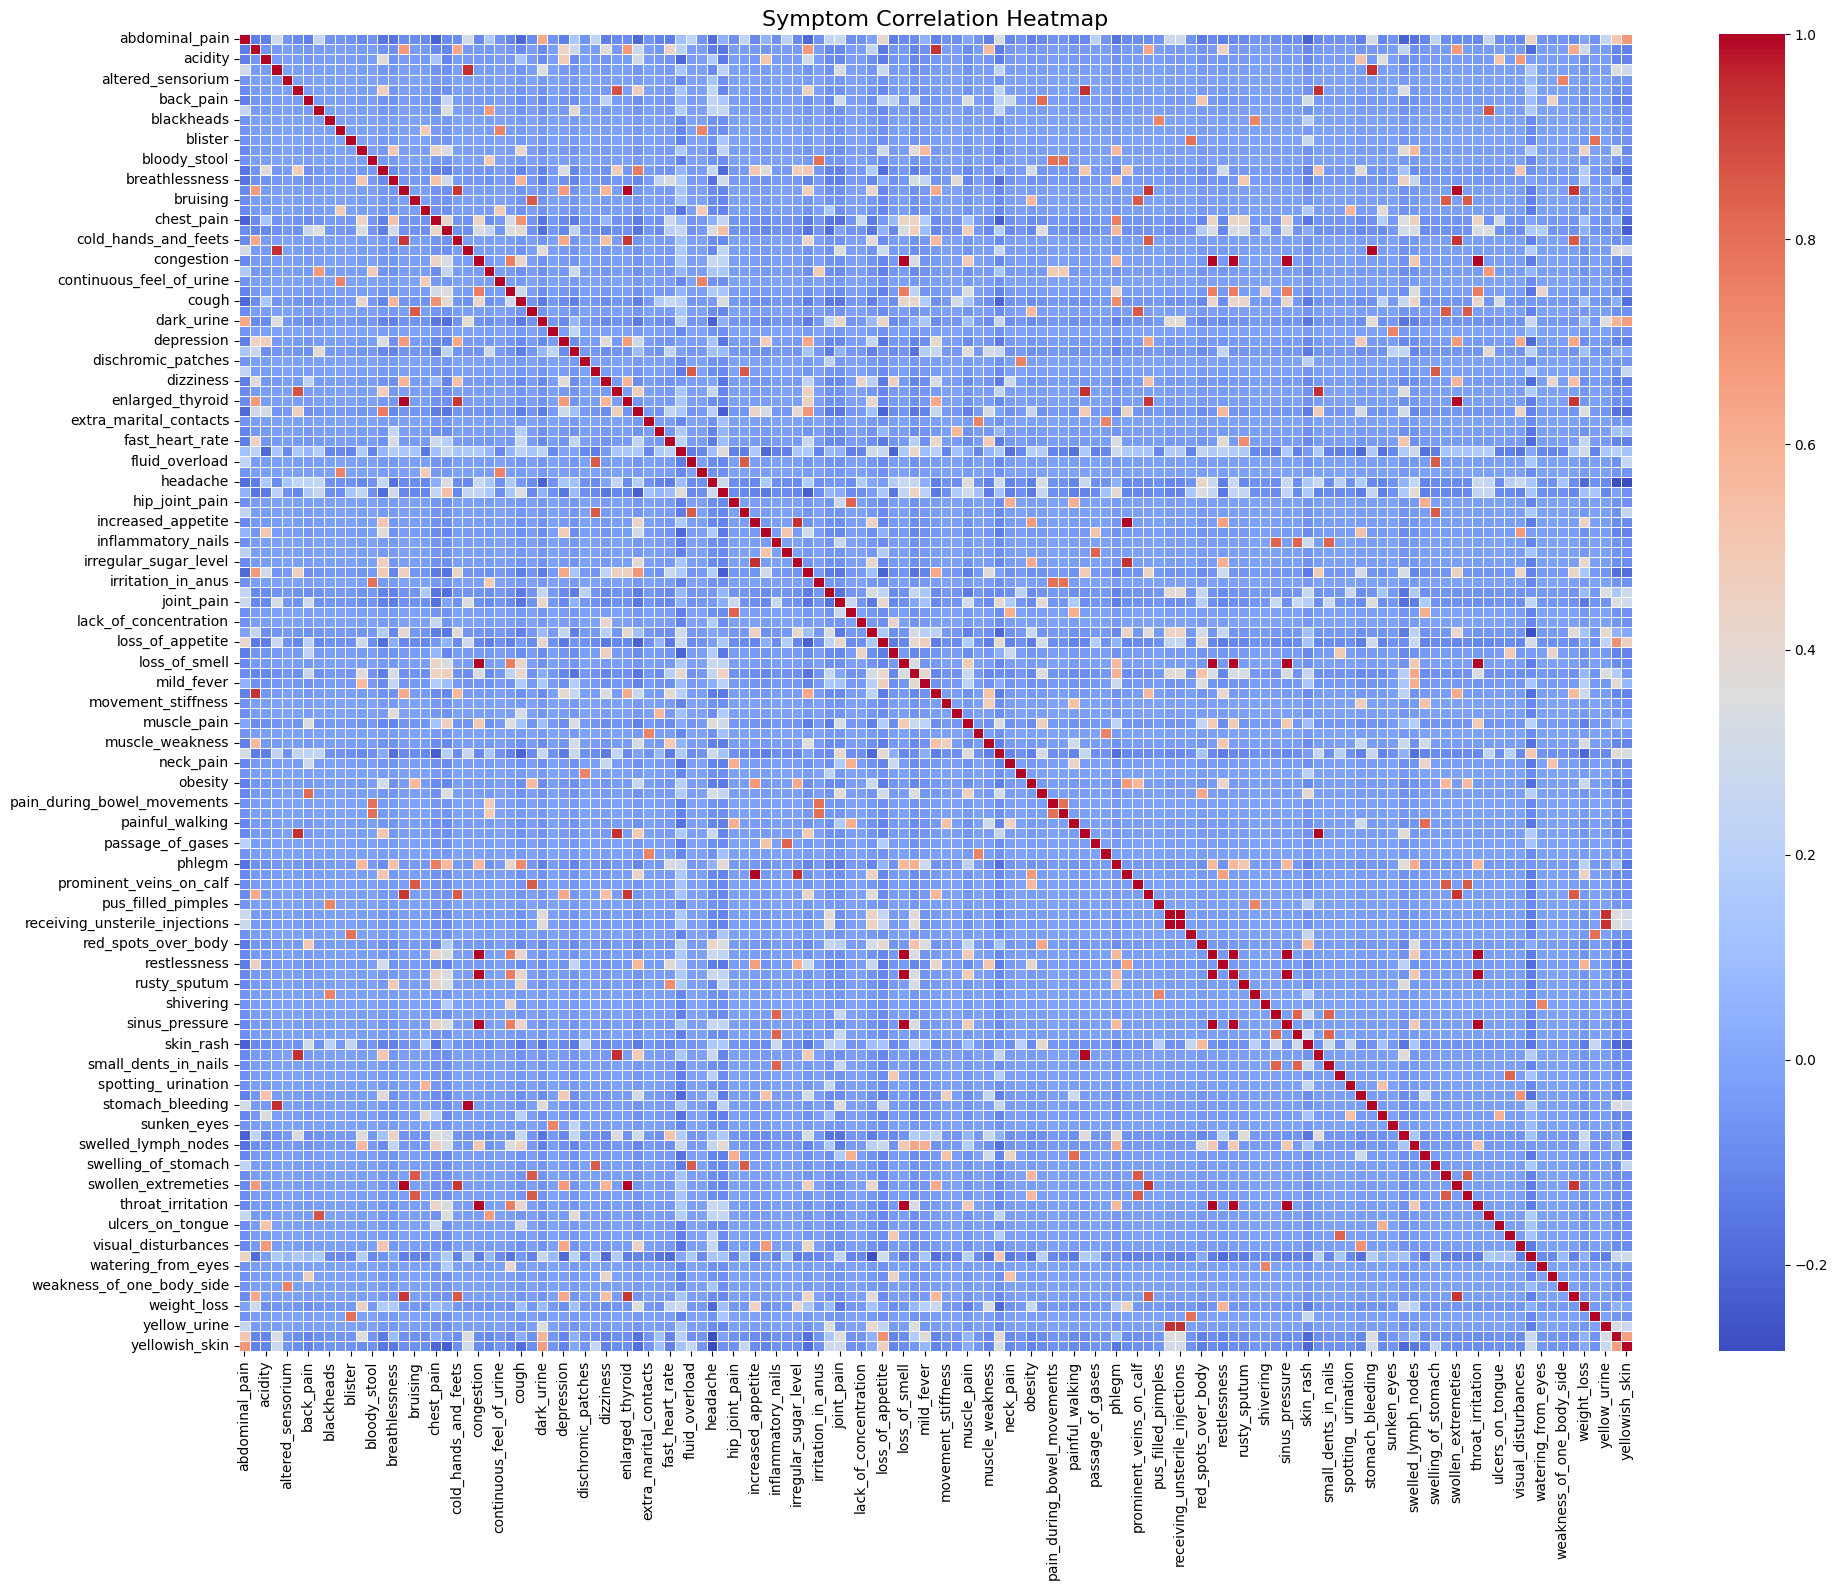

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X_symptoms.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Symptom Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


### MODEL TRAINING (Random Forest)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Grid search
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluation
print(" Random Forest Evaluation")
print("Best Parameters:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


 Random Forest Evaluation
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00 

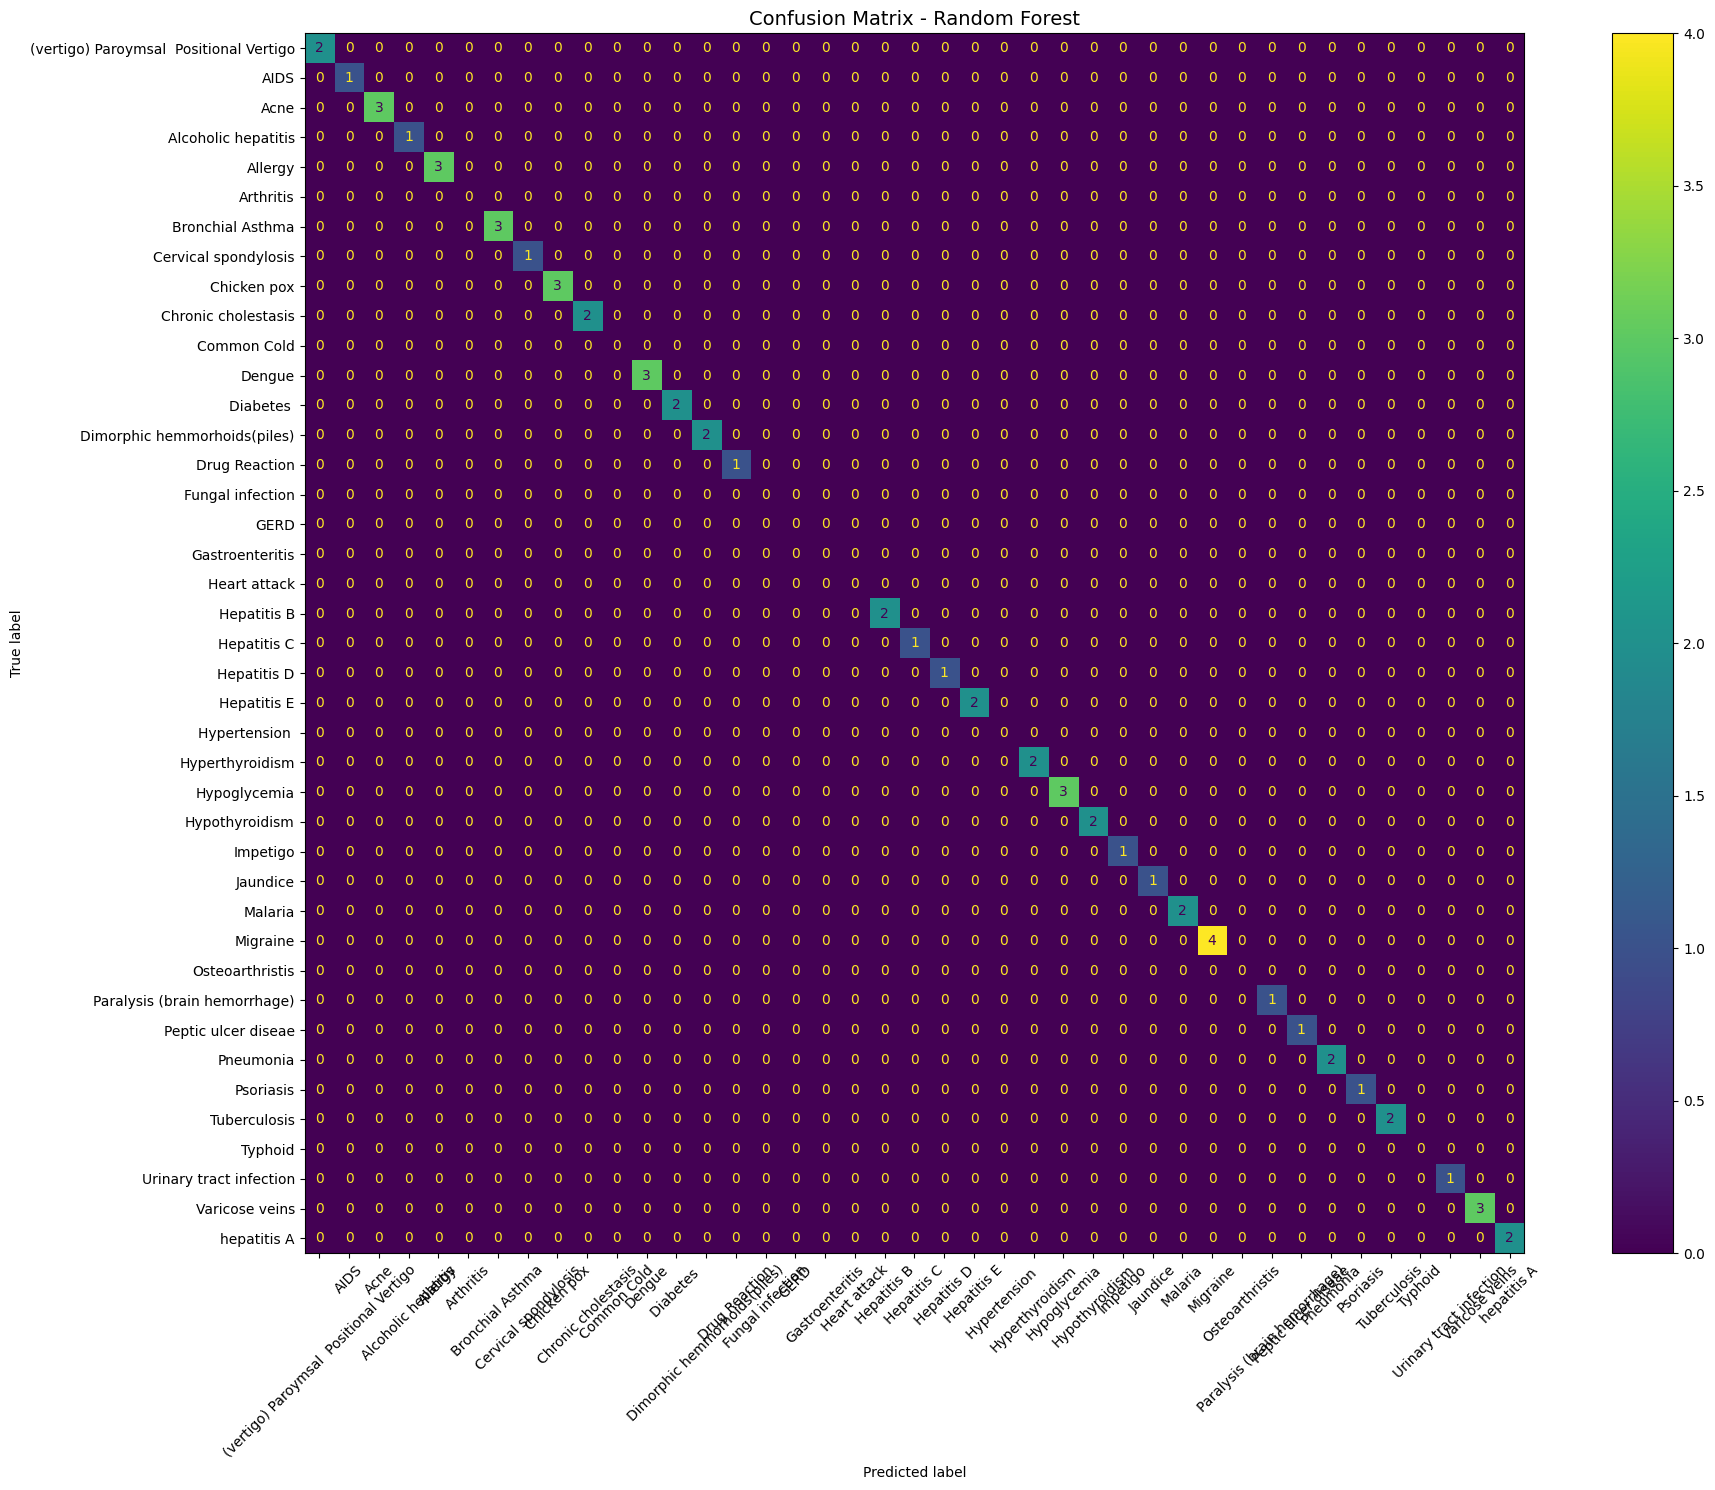

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=best_rf.classes_)

# Create display with larger figure size
fig, ax = plt.subplots(figsize=(20, 15))  # Adjust width & height as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.inverse_transform(best_rf.classes_))
disp.plot(ax=ax, xticks_rotation=45)

plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


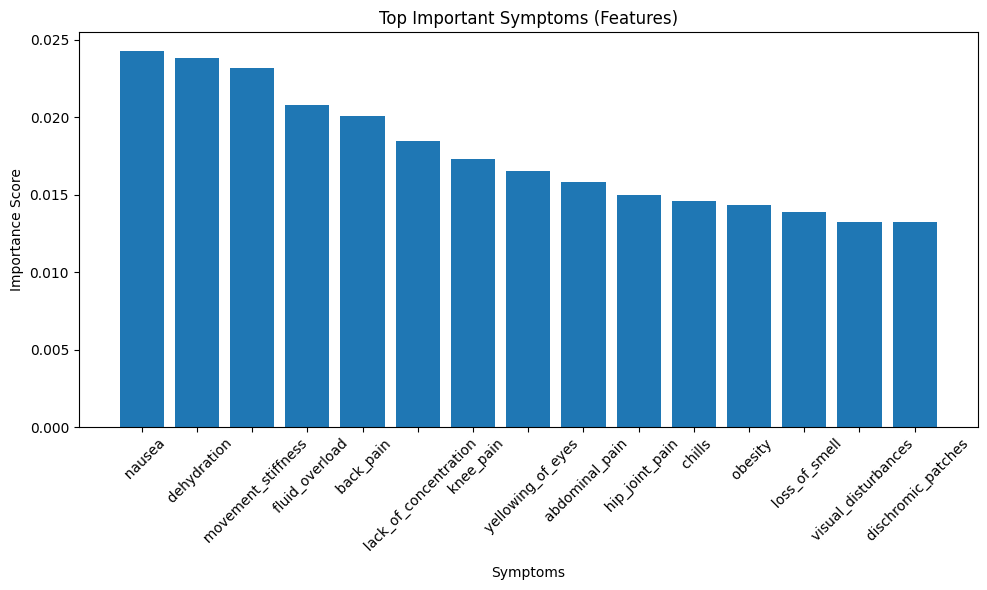

In [24]:
import numpy as np

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = 15  # number of top symptoms to show

# Plot top symptoms
plt.figure(figsize=(10, 6))
plt.bar(range(top_features), importances[indices[:top_features]], align="center")
plt.xticks(range(top_features), [mlb.classes_[i] for i in indices[:top_features]], rotation=45)
plt.title("Top Important Symptoms (Features)")
plt.xlabel("Symptoms")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


### Naive Bayes Model

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define model
nb = MultinomialNB()

# Define hyperparameters
params_nb = {
    'alpha': [0.1, 0.5, 1.0]
}

# Grid search
grid_nb = GridSearchCV(nb, params_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(X_train, y_train)

# Best estimator
best_nb = grid_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)

# Evaluation
print("✅ Naive Bayes Evaluation")
print("Best Parameters:", grid_nb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


✅ Naive Bayes Evaluation
Best Parameters: {'alpha': 0.1}
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      

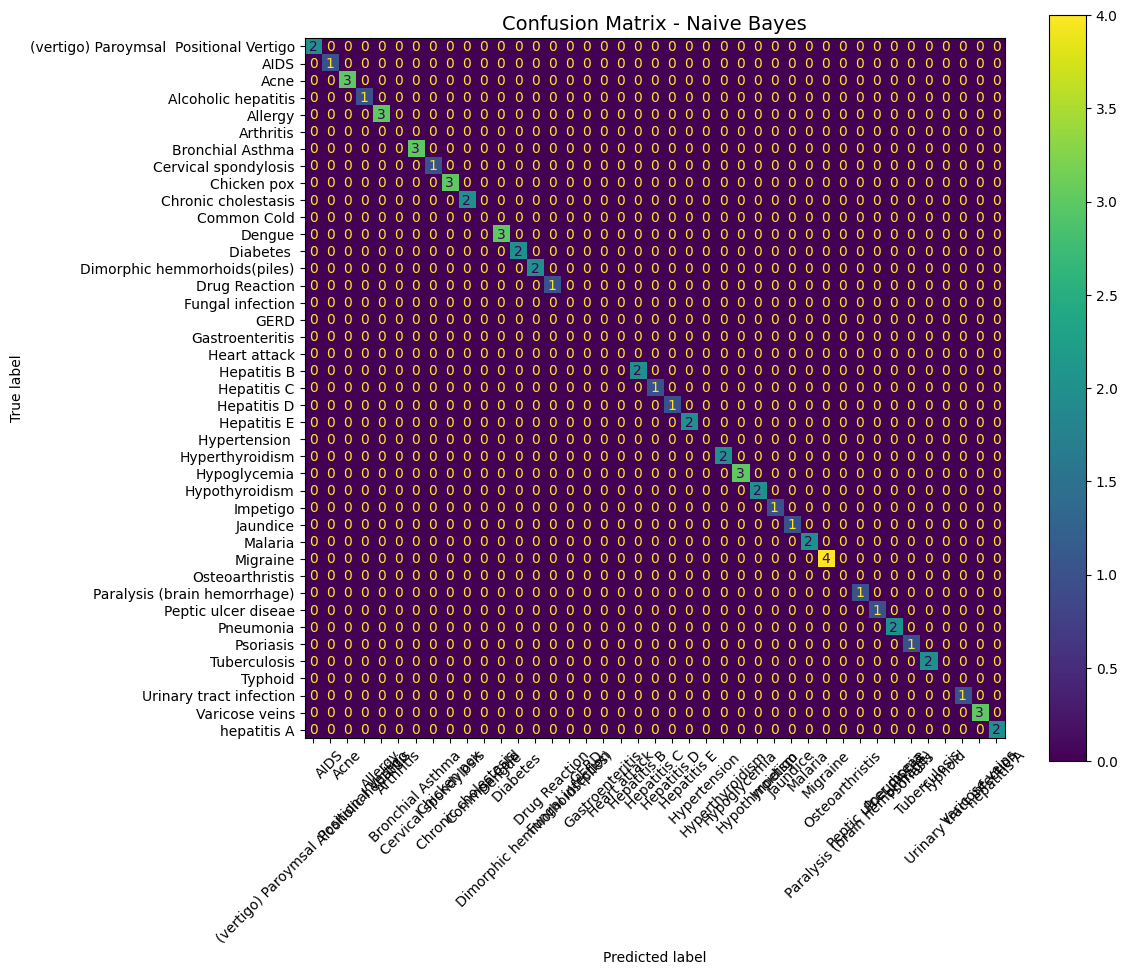

In [26]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=best_nb.classes_)

fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=label_encoder.inverse_transform(best_nb.classes_))
disp.plot(ax=ax, xticks_rotation=45)

plt.title("Confusion Matrix - Naive Bayes", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### XGboost Model

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Re-initialize and fit the upgraded XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:04:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8524590163934426

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         3
           6       1.00      0.67      0.80         3
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          19       1.00      1.00      1.00         2
          20       0.33      1.00      0.50         1
          21       0.00    

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

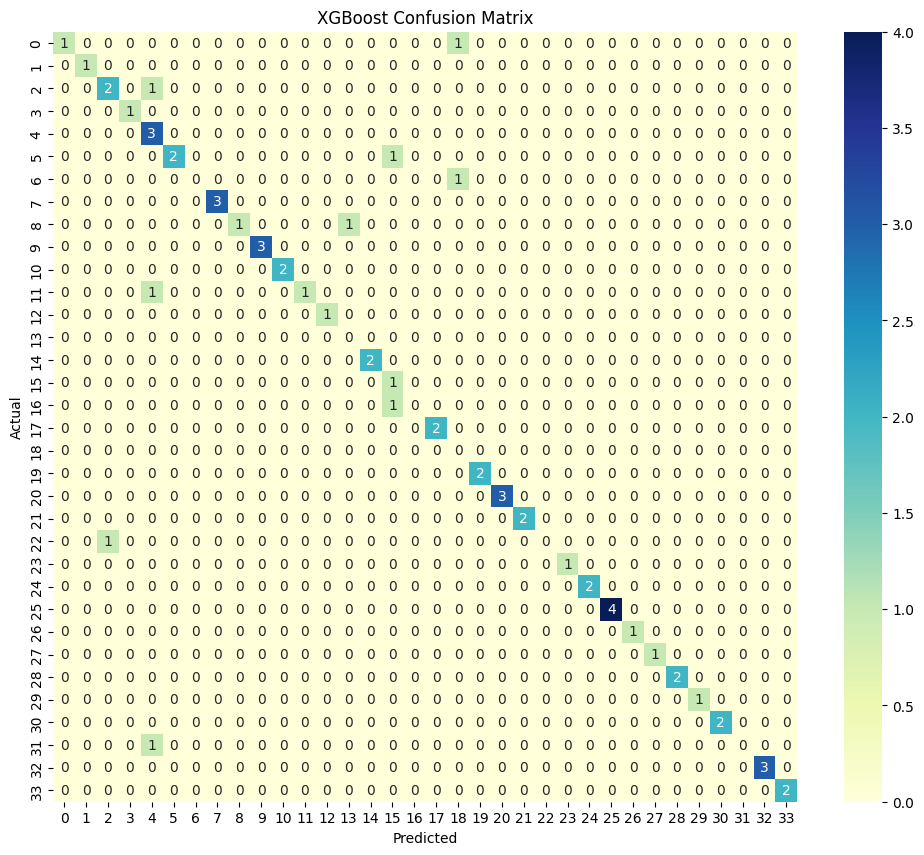

In [28]:
# Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="YlGnBu")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


XGBoost Accuracy: 0.8525


### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Regularization strength
    'solver': ['liblinear', 'lbfgs'], # Solvers (liblinear is good for small datasets)
    'max_iter': [100, 200]
}

# Initialize model
log_reg = LogisticRegression(multi_class='auto')

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_log_reg = grid_search.best_estimator_

# Predict
y_pred = best_log_reg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Logistic Regression Accuracy:", round(accuracy * 100, 2), "%")

# Classification Report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))



Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


✅ Logistic Regression Accuracy: 100.0 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22  

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


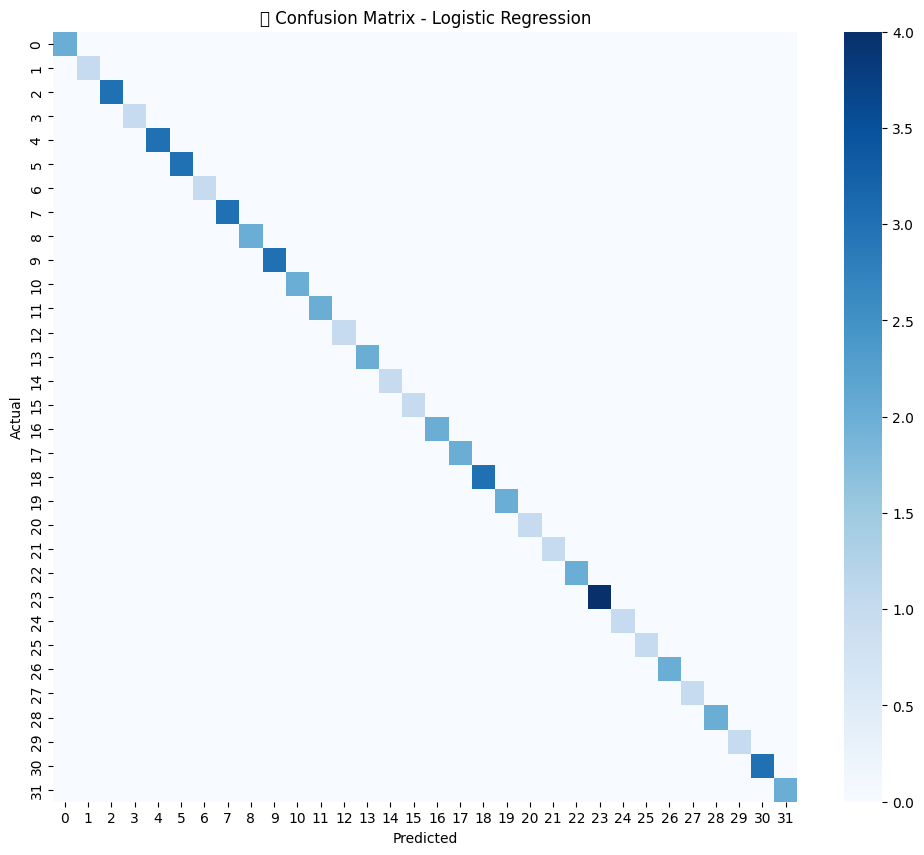

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, cmap="Blues", annot=False, fmt='d')
plt.title("🔍 Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Support Vector Machine (SVM)


In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],                # Regularization
    'kernel': ['linear', 'rbf'],     # Linear and Gaussian kernel
    'gamma': ['scale', 'auto']       # Kernel coefficient
}

# Create the SVC model
svc = SVC()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_svc = grid_search.best_estimator_

# Predictions
y_pred_svc = best_svc.predict(X_test)

# Accuracy
svc_acc = accuracy_score(y_test, y_pred_svc)
print("SVM Accuracy:", svc_acc)
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))


Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


SVM Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      1.00      

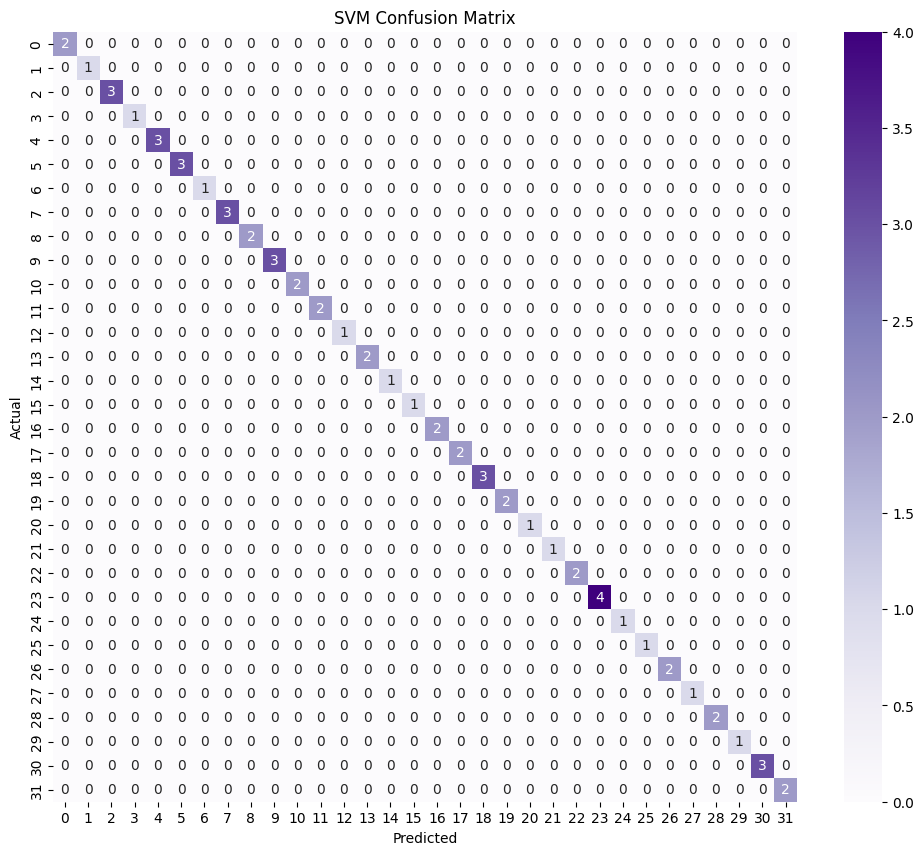

In [33]:
# Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Model Comparison

In [34]:
from sklearn.metrics import accuracy_score

nb_preds = best_nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_preds)

In [35]:
nb_acc

1.0

In [36]:
rf_preds = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

In [37]:
rf_acc

1.0

In [38]:
xgb_preds = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)


In [39]:
xgb_acc

0.8524590163934426

In [40]:
svc_preds = best_svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_preds)


In [41]:
svc_acc

1.0

In [42]:
from sklearn.metrics import accuracy_score

# Assuming you already did predictions with Logistic Regression
log_preds = best_log_reg.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)


In [43]:
log_acc


1.0

In [44]:
model_accuracies = {
    "Naive Bayes": nb_acc,
    "Random Forest": rf_acc,
    "XGBoost": xgb_acc,
    "SVM": svc_acc,
    "Logistic Regression": log_acc
}

import pandas as pd
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
accuracy_df


,Model,Accuracy
0,Naive Bayes,1.000000
1,Random Forest,1.000000
2,SVM,1.000000
3,Logistic Regression,1.000000
4,XGBoost,0.852459


### Model Comparison Visualization

C:\Users\user\AppData\Local\Temp\ipykernel_7876\1097672575.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_df, x="Model", y="Accuracy", palette="viridis")


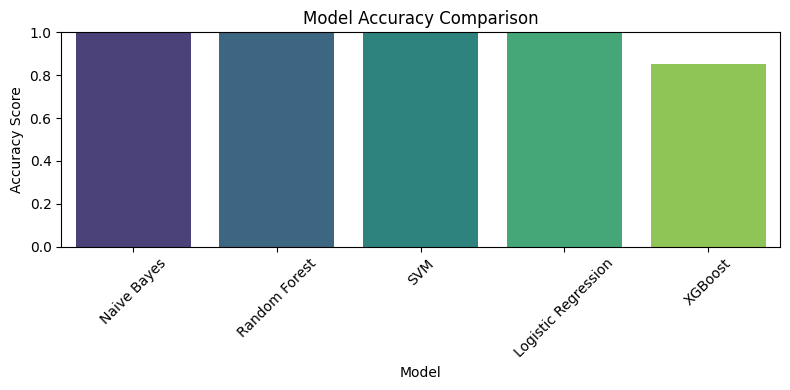

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(data=accuracy_df, x="Model", y="Accuracy", palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
best_model_name = accuracy_df.iloc[3]["Model"]
print(f"✅ Best model based on accuracy: {best_model_name}")


✅ Best model based on accuracy: Logistic Regression


In [49]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a function for easy reuse
def evaluate_model_cv(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()


In [50]:
# Naive Bayes
nb_cv_mean, nb_cv_std = evaluate_model_cv(best_nb, X, y)

# Random Forest
rf_cv_mean, rf_cv_std = evaluate_model_cv(best_rf, X, y)

# SVM
svc_cv_mean, svc_cv_std = evaluate_model_cv(best_svc, X, y)

# Logistic Regression
log_cv_mean, log_cv_std = evaluate_model_cv(best_log_reg, X, y)


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Pytho

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Store results in a DataFrame
cv_results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression'],
    'CV Mean Accuracy': [nb_cv_mean, rf_cv_mean, svc_cv_mean, log_cv_mean],
    'CV Std Dev': [nb_cv_std, rf_cv_std, svc_cv_std, log_cv_std]
})

# Sort by accuracy
cv_results = cv_results.sort_values(by='CV Mean Accuracy', ascending=False)
cv_results


,Model,CV Mean Accuracy,CV Std Dev
0,Naive Bayes,1.000000,0.000000
2,SVM,1.000000,0.000000
3,Logistic Regression,1.000000,0.000000
1,Random Forest,0.986831,0.012283


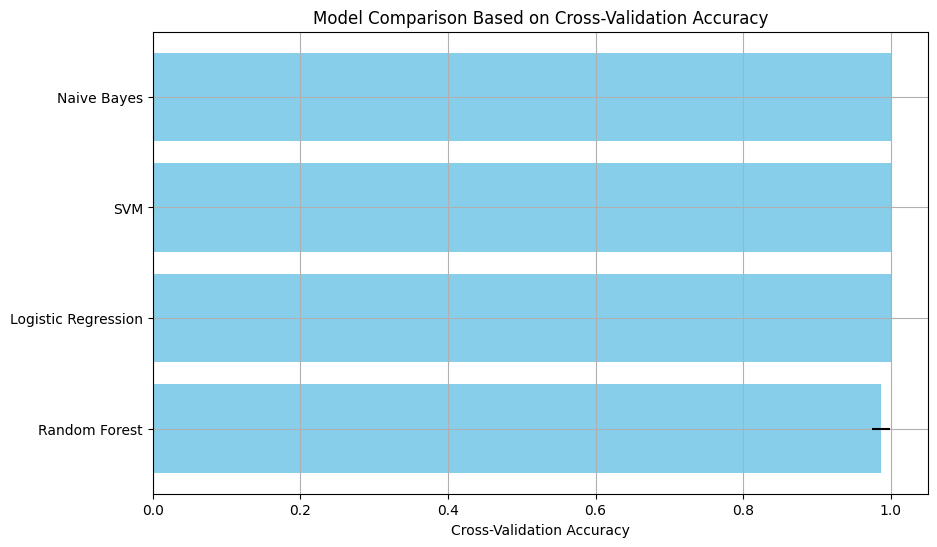

In [52]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(cv_results['Model'], cv_results['CV Mean Accuracy'], xerr=cv_results['CV Std Dev'], color='skyblue')
plt.xlabel("Cross-Validation Accuracy")
plt.title("Model Comparison Based on Cross-Validation Accuracy")
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.grid(True)
plt.show()


### Model comparison using Cross-Validation (CV) accuracy, precision, recall, and F1-score

### Define Updated Evaluation Function

In [53]:
from sklearn.model_selection import cross_validate

def evaluate_model_metrics(model, X, y, cv=5):
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    
    return {
        'Accuracy': (scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
        'Precision': (scores['test_precision_weighted'].mean(), scores['test_precision_weighted'].std()),
        'Recall': (scores['test_recall_weighted'].mean(), scores['test_recall_weighted'].std()),
        'F1 Score': (scores['test_f1_weighted'].mean(), scores['test_f1_weighted'].std()),
    }


### Evaluate All Models

In [54]:
# Naive Bayes
nb_metrics = evaluate_model_metrics(best_nb, X, y)

# Random Forest
rf_metrics = evaluate_model_metrics(best_rf, X, y)

# SVM
svc_metrics = evaluate_model_metrics(best_svc, X, y)

# Logistic Regression
log_metrics = evaluate_model_metrics(best_log_reg, X, y)


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  

### Create a DataFrame for Comparison

In [55]:
import pandas as pd

model_metrics_df = pd.DataFrame({
    'Naive Bayes': {k: v[0] for k, v in nb_metrics.items()},
    'Random Forest': {k: v[0] for k, v in rf_metrics.items()},
    'SVM': {k: v[0] for k, v in svc_metrics.items()},
    'Logistic Regression': {k: v[0] for k, v in log_metrics.items()},
})

# Transpose to have models as rows
model_metrics_df = model_metrics_df.T
model_metrics_df.round(4)


,Accuracy,Precision,Recall,F1 Score
Naive Bayes,1.0000,1.0000,1.0000,1.0000
Random Forest,0.9868,0.9835,0.9868,0.9835
SVM,1.0000,1.0000,1.0000,1.0000
Logistic Regression,1.0000,1.0000,1.0000,1.0000


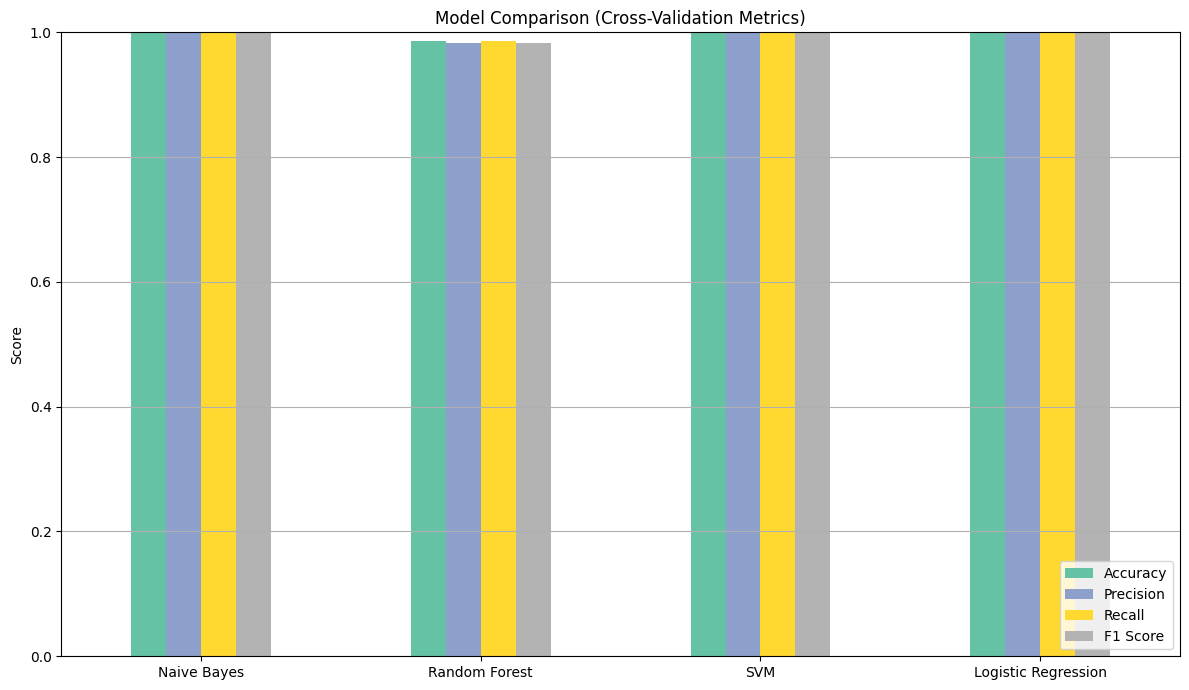

In [56]:
model_metrics_df.plot(kind='bar', figsize=(12, 7), colormap='Set2')
plt.title("Model Comparison (Cross-Validation Metrics)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [59]:
# Calculate average of all metrics for each model
model_metrics_df['Average Score'] = model_metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1)

# Sort by average score (descending)
model_metrics_df_sorted = model_metrics_df.sort_values(by='Average Score', ascending=False)

# Display sorted DataFrame
print(model_metrics_df_sorted)

# Get best model name
best_model_name = model_metrics_df_sorted.index[2]
print(f"\nBest overall model: {best_model_name}")


                     Accuracy  Precision    Recall  F1 Score  Average Score
Naive Bayes          1.000000   1.000000  1.000000  1.000000        1.00000
SVM                  1.000000   1.000000  1.000000  1.000000        1.00000
Logistic Regression  1.000000   1.000000  1.000000  1.000000        1.00000
Random Forest        0.986831   0.983525  0.986831  0.983534        0.98518

Best overall model: Logistic Regression


### Save the best model with Joblib


In [52]:
import joblib

# Save the model
joblib.dump(best_log_reg, "best_disease_prediction_model.pkl")
print("✅ Model saved as 'best_disease_prediction_model.pkl'")


✅ Model saved as 'best_disease_prediction_model.pkl'


### Prediction

In [60]:
import pandas as pd
import joblib

# Load model and label encoder
model = joblib.load("best_disease_prediction_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")  # You MUST have saved this earlier

# Sample test symptoms
test_symptoms = ["continuous_sneezing", "shivering", "chills"]

# Load the full list of symptoms used during training
with open("training_features_list.txt", "r") as f:
    all_symptoms = [line.strip() for line in f.readlines()]

# Create input vector
input_vector = [1 if symptom in test_symptoms else 0 for symptom in all_symptoms]
input_df = pd.DataFrame([input_vector], columns=all_symptoms)

# Predict disease
predicted_label = model.predict(input_df)[0]

# Convert back to disease name
predicted_disease = label_encoder.inverse_transform([predicted_label])[0]

print("🔍 Predicted Disease:", predicted_disease)

# Load main dataset with description/precautions
df = pd.read_csv("master_dataset.csv")

# ---- Get Disease Details ----
disease_info = df[df['Disease'] == predicted_disease]

if not disease_info.empty:
    disease_info = disease_info.iloc[0]

    print("\n📝 Description:")
    print(disease_info['Symptom_Description'])

    print("\n💊 Precautions:")
    print(disease_info['Precautions'])
else:
    print("⚠️ Disease not found in the dataset.")


🔍 Predicted Disease: Allergy

📝 Description:
An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens.

💊 Precautions:
['apply calamine', 'cover area with bandage', nan, 'use ice to compress itching']


In [61]:
import pandas as pd
import joblib
import json

# 🔁 Load model and label encoder
model = joblib.load("best_disease_prediction_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# 🩺 Sample test symptoms (can be replaced dynamically)
test_symptoms = ["continuous_sneezing", "shivering", "chills"]

# 📥 Load symptoms used during training
with open("training_features_list.txt", "r") as f:
    all_symptoms = [line.strip() for line in f.readlines()]

# 🔢 Convert test symptoms into input vector
input_vector = [1 if symptom in test_symptoms else 0 for symptom in all_symptoms]
input_df = pd.DataFrame([input_vector], columns=all_symptoms)

# 🔍 Predict disease
predicted_label = model.predict(input_df)[0]
predicted_disease = label_encoder.inverse_transform([predicted_label])[0]

print(f"\n🦠 Predicted Disease: {predicted_disease}")

# 📄 Load master dataset for description and precautions
df = pd.read_csv("master_dataset.csv")

# ℹ️ Get disease info
disease_info = df[df['Disease'].str.lower() == predicted_disease.lower()]

if not disease_info.empty:
    disease_info = disease_info.iloc[0]

    print("\n📝 Description:")
    print(disease_info.get('Symptom_Description', 'N/A'))

    print("\n💊 Precautions:")
    print(disease_info.get('Precautions', 'N/A'))
else:
    print("⚠️ Disease not found in master dataset.")

# 🥗 Load food recommendation data
try:
    with open("disease_food_map.json", "r") as f:
        food_map = json.load(f)

    food_info = food_map.get(predicted_disease.lower(), {})

    print("\n✅ Foods to Eat:")
    print(food_info.get("Food to Eat", "No data available"))

    print("\n🚫 Foods to Avoid:")
    print(food_info.get("Food to Avoid", "No data available"))

except FileNotFoundError:
    print("\n⚠️ Food recommendation file not found.")



🦠 Predicted Disease: Allergy

📝 Description:
An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens.

💊 Precautions:
['apply calamine', 'cover area with bandage', nan, 'use ice to compress itching']

✅ Foods to Eat:
vitamine C such as citrus fruits, including oranges, kiwi, lemon and grapefruit, bell peppers, strawberries, Tomatoes, white potatoes, cruciferous vegetables, including broccoli, brussels sprout, cabbage and cauliflower

🚫 Foods to Avoid:
fried food, white bread and pastries, red meat(burgers, steaks) and processed meat (hot dogs, sausage. Fat-heavy spreads, such as butter or margarine


In [2]:
!pip3 install openai


  Using cached openai-1.90.0-py3-none-any.whl.metadata (26 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.1-py3-none-any.whl.metadata (2.6 kB)
Using cached openai-1.90.0-py3-none-any.whl (734 kB)
Using cached distro-1.9.0-py3-none-any.whl (20 kB)
Using cached pydantic-2.11.7-py3-none-any.whl (444 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 448.1 kB/s eta 0:00:04
   ---------- ----------------------------- 0.5/2.0 MB 448.1 kB/s eta 0:00:04
   -


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import openai
print("OpenAI imported successfully!")


OpenAI imported successfully!
